### DSP Project on Rating System for Customer's Reviews of on Products 

##### Amazon Dataset: https://nijianmo.github.io/amazon/index.html#code

In [1]:
# import the libraries

In [8]:
import numpy as np

import pandas as pd

In [9]:
import json

In [10]:
dataPath = '/Users/OLALYTICS/dsp-final-project/data/'

dataset_name = 'Amazon_Kindle_Store.json'

In [11]:
data = []

with open(dataPath + dataset_name) as f:
    
    for line in f:
        
        json_data = json.loads(line)
        
        data.append(json_data)
    

In [12]:
df1 = pd.DataFrame(data)

In [19]:
# Selecting 30% of the dataset to boost the running time while loading

df = df1.sample(frac = 0.3, random_state = 42)

# Resetting the index of the 10% sample DataFrame

df.reset_index(drop = True, inplace = True)

In [20]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,False,"12 13, 2013",A30SHRDUQFXF6V,B00FPZ53PW,{'Format:': ' Kindle Edition'},Steve Bureau,"Wow, there is a ton of content there! 52 pages...",A lot of content,1386892800,NaN,NaN
1,5.0,True,"10 8, 2016",A3OCKJ3WL1IVRI,B01H2XPLB0,{'Format:': ' Kindle Edition'},ckc,Ah here we go again. New season New characters...,The Wifey'$ are back,1475884800,NaN,NaN
2,5.0,False,"08 17, 2015",A3DVTU6BUBAC6,B00XVC88VC,{'Format:': ' Kindle Edition'},Jaime,"My god! Conscience, the 2nd installment in Cec...",FANTASTIC 2nd installment!!!!!,1439769600,6,NaN
3,5.0,True,"05 27, 2015",A175GM0AGKEBBF,B00UZKS8V8,{'Format:': ' Kindle Edition'},Teresa M Palombi,"OMG, I wanted more",Five Stars,1432684800,NaN,NaN
4,5.0,True,"03 10, 2015",AHPYP1RPIJ7TU,B00O6KVFC2,{'Format:': ' Kindle Edition'},randy atkins,Good read all the way throughout,Five Stars,1425945600,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222983 entries, 0 to 2222982
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   style           object 
 6   reviewerName    object 
 7   reviewText      object 
 8   summary         object 
 9   unixReviewTime  int64  
 10  vote            object 
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 188.7+ MB


In [13]:
import seaborn as sns

<Axes: xlabel='overall', ylabel='count'>

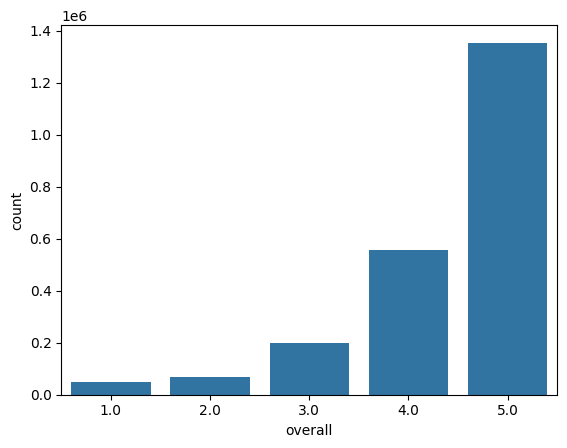

In [14]:
sns.countplot(x = 'overall', data = df)

<Axes: xlabel='verified', ylabel='count'>

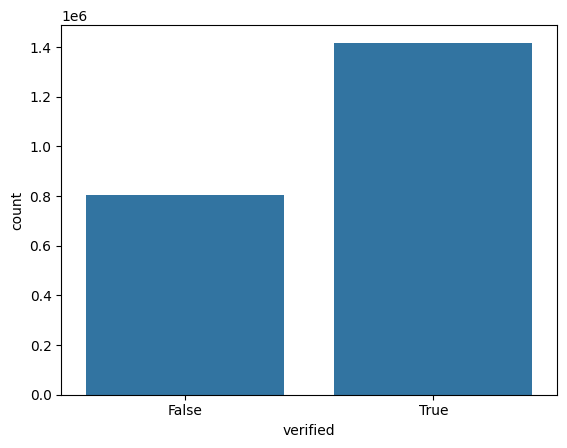

In [17]:
sns.countplot(x = 'verified', data = df)

In [ ]:
# The customer's rating analysis

### interested columns: `reviewText and overall`

In [22]:
data_df = df[['reviewText','overall']]

data_df.head()

,reviewText,overall
0,"Wow, there is a ton of content there! 52 pages...",4.0
1,Ah here we go again. New season New characters...,5.0
2,"My god! Conscience, the 2nd installment in Cec...",5.0
3,"OMG, I wanted more",5.0
4,Good read all the way throughout,5.0


In [23]:
data_df.sample(5)

,reviewText,overall
245770,I started this book not knowing what it was ab...,4.0
406713,These 2 stores are very fast reads. I'm glad ...,4.0
198292,Couldn't put it down. An excellent story abou...,5.0
145039,Very good read. Short....sweet..and don't need...,5.0
37655,Loved this book it made me cry and I love that...,5.0


In [24]:
data_df['overall'].value_counts()

overall
5.0    406286
4.0    166700
3.0     59324
2.0     20187
1.0     14398
Name: count, dtype: int64

In [ ]:
# preprocessing

In [25]:
from bs4 import BeautifulSoup

from unidecode import unidecode

import re

def clean_text(text):
    
    text = str(text).lower().replace('\\', '').replace('_', ' ')
    #text = contractions.fix(text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = unidecode(text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub("(.)\\1{2,}", "\\1", text)
                        
    return text

In [26]:

data_df['reviewText'] = data_df['reviewText'].apply(lambda text: clean_text(text))

/var/folders/c6/ht4lr6411jqdn8bhdr_m1dh00000gp/T/ipykernel_65431/2549876200.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')
/var/folders/c6/ht4lr6411jqdn8bhdr_m1dh00000gp/T/ipykernel_65431/1075072618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['reviewText'] = data_df['reviewText'].apply(lambda text: clean_text(text))


In [27]:
data_df.head()

,reviewText,overall
0,wow there is a ton of content there 52 pages i...,4.0
1,ah here we go again new season new characters ...,5.0
2,my god conscience the 2nd installment in cecil...,5.0
3,omg i wanted more,5.0
4,good read all the way throughout,5.0


In [ ]:
# implementing the algorithm

In [ ]:
# Term Frequency - Inverse Document Frequency(TFIDF) and Linear Support Vector Machine(SVM)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report

In [29]:
tfidf = TfidfVectorizer(max_features = None, ngram_range = (1,3), analyzer = 'char')

            # ngram = 1,5

In [30]:
tfidf.fit(data_df['reviewText'])

TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

In [31]:
# Features selection 

X = tfidf.transform(data_df['reviewText'])

In [32]:
y = data_df['overall']

In [ ]:
X.shape, y.shape

In [33]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [34]:
X_train.shape

(500171, 25079)

In [ ]:
# Model fitting using LinearSVC

In [35]:
# Initializing the model

LinSVC = LinearSVC(C = 20, class_weight = 'balanced') 

In [36]:
LinSVC.fit(X_train, y_train)

/Users/OLALYTICS/dsproject/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/OLALYTICS/dsproject/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=20, class_weight='balanced')

In [37]:
predicted_rating = LinSVC.predict(X_test)

predicted_rating

array([1., 3., 5., ..., 5., 3., 3.])

In [ ]:
# classification report for model performance

In [38]:
print(classification_report(y_test, predicted_rating))

              precision    recall  f1-score   support

         1.0       0.30      0.54      0.38      3672
         2.0       0.22      0.40      0.29      5053
         3.0       0.35      0.44      0.39     14698
         4.0       0.49      0.33      0.39     41692
         5.0       0.79      0.82      0.81    101609

    accuracy                           0.64    166724
   macro avg       0.43      0.50      0.45    166724
weighted avg       0.65      0.64      0.64    166724



In [ ]:
# Predicting the Rating based on customer's review

In [43]:
text_entry = input('Please provide your reviews: ')

text_entry = clean_text(text_entry)

text_transformed = tfidf.transform([text_entry])


print('\nThe predicted overall rating is: ', LinSVC.predict(text_transformed))

Please provide your reviews:  I dislike the book



The predicted overall rating is:  [1.]


In [ ]:
# loading model to pickle

In [ ]:
import pickle

In [ ]:
with open('dsp_project_model.pkl', 'wb') as file:
    pickle.dump(LinSVC, file)

In [ ]:
# reading the pickle file

In [ ]:
#import pickle

In [ ]:
#with open('dsp_project_model.pkl', 'rb') as file:
    #clf = pickle.load(file)

In [ ]:
# predict with it

In [ ]:
#predictions = clf.predict([['this product is good']])

In [ ]:
#predictions